###### drxmukeshchoudhary

In [41]:
! pip install matplotlib
! pip install scikit-learn
! pip install pandas
! pip install numpy
! pip install seaborn

In [56]:
 
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import svm
from sklearn import ensemble

In [57]:
import pandas as pd
train_data = pd.read_csv('mat_csv/train.csv')

In [58]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [59]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
df_train = train_data.copy()

In [64]:
df_train.dropna(inplace=True)

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [66]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


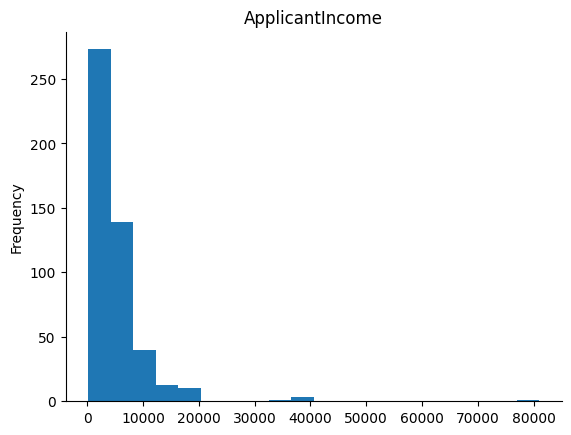

In [67]:
df_train['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

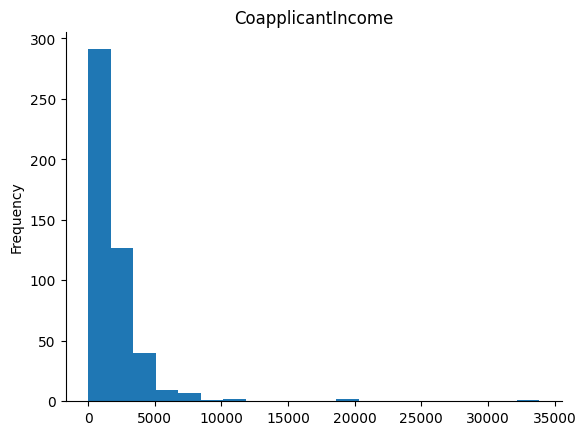

In [68]:
df_train['CoapplicantIncome'].plot(kind='hist', bins=20, title='CoapplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

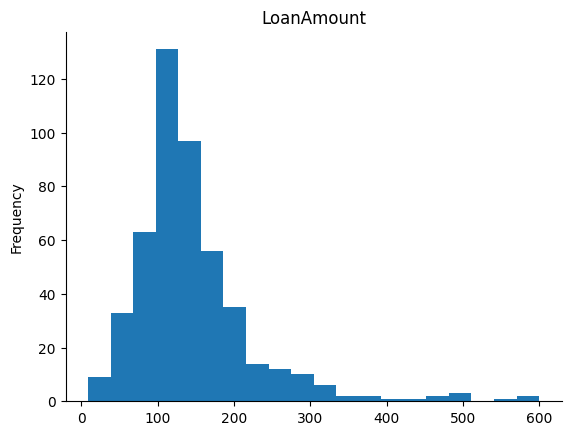

In [ ]:
df_train['LoanAmount'].plot(kind='hist', bins=20, title='LoanAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

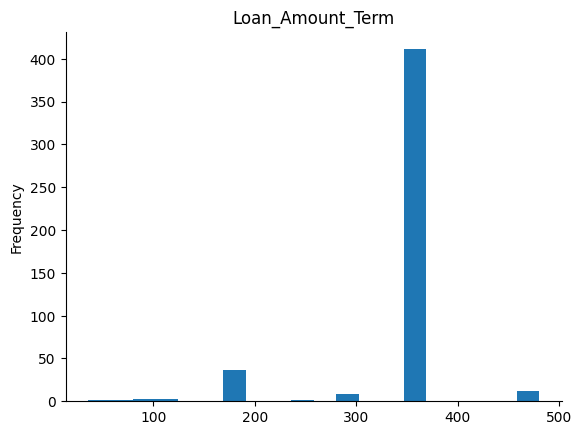

In [ ]:
df_train['Loan_Amount_Term'].plot(kind='hist', bins=20, title='Loan_Amount_Term')
plt.gca().spines[['top', 'right',]].set_visible(False)

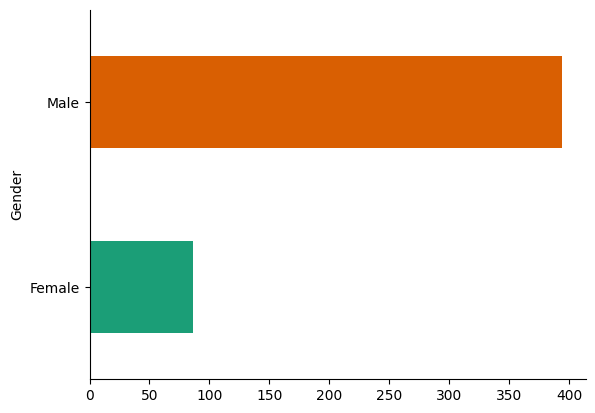

In [71]:
df_train.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

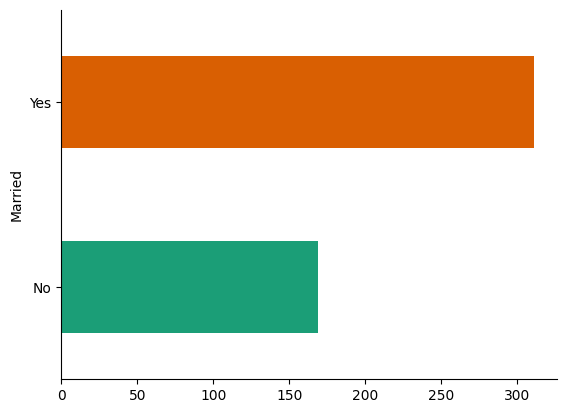

In [72]:

df_train.groupby('Married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

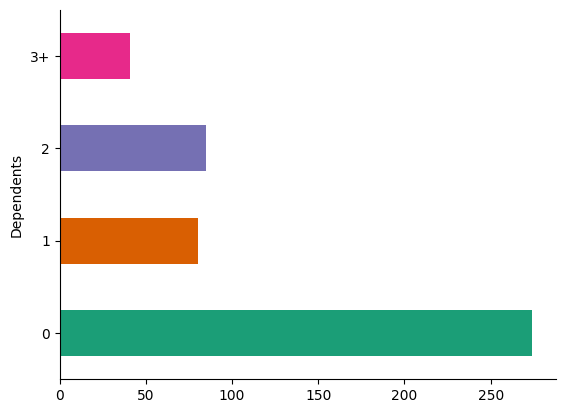

In [73]:
df_train.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

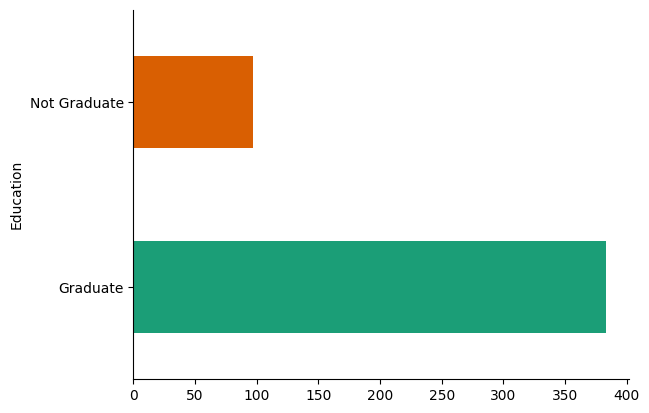

In [74]:
df_train.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

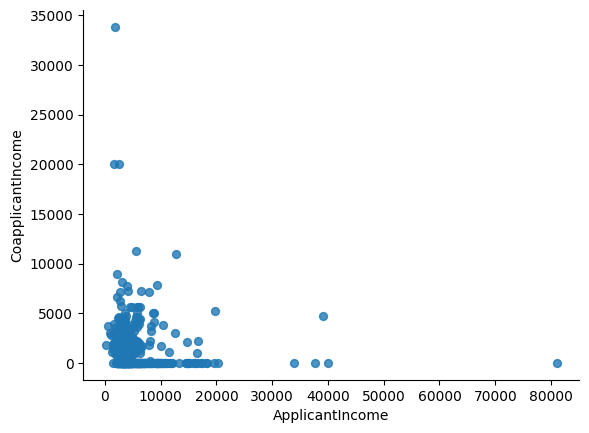

In [75]:
df_train.plot(kind='scatter', x='ApplicantIncome', y='CoapplicantIncome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

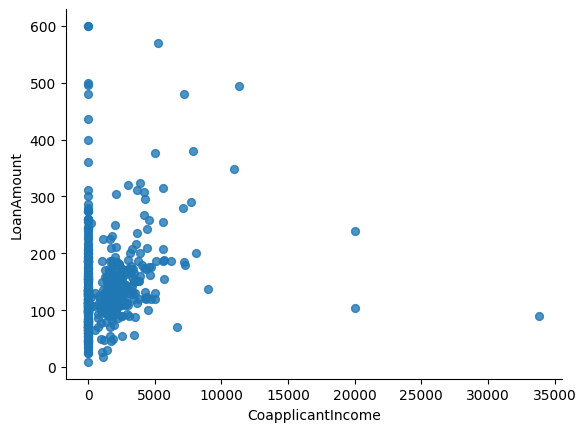

In [76]:
df_train.plot(kind='scatter', x='CoapplicantIncome', y='LoanAmount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

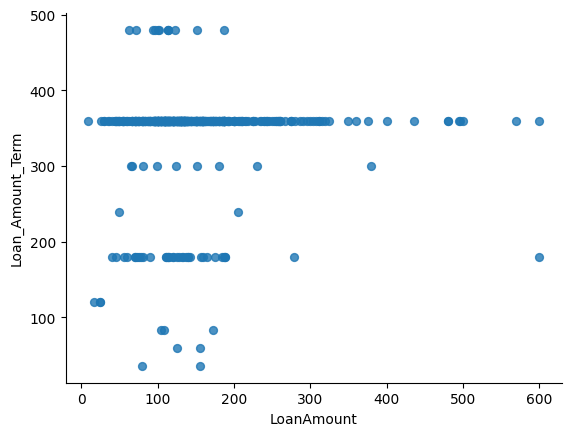

In [77]:
df_train.plot(kind='scatter', x='LoanAmount', y='Loan_Amount_Term', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

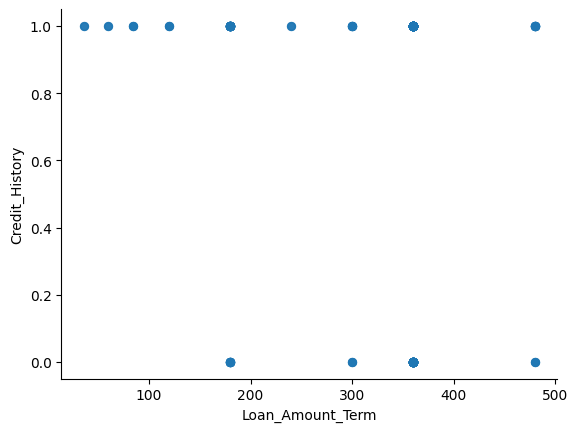

In [78]:
df_train.plot(kind='scatter', x='Loan_Amount_Term', y='Credit_History', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

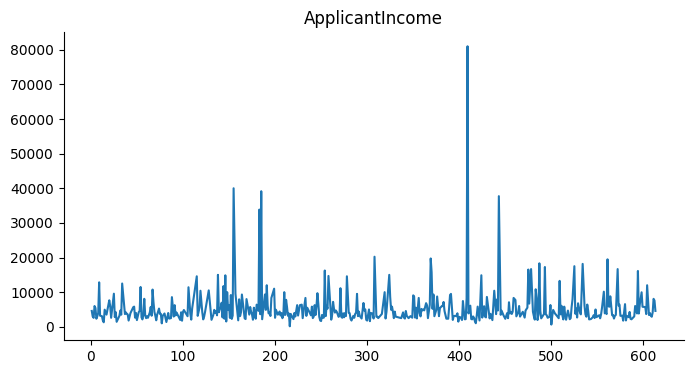

In [79]:
df_train['ApplicantIncome'].plot(kind='line', figsize=(8, 4), title='ApplicantIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

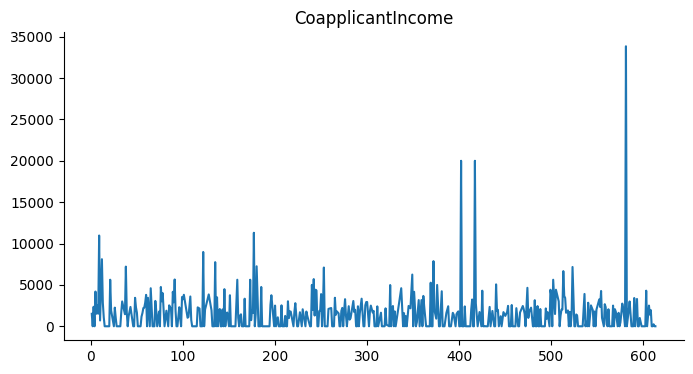

In [80]:
df_train['CoapplicantIncome'].plot(kind='line', figsize=(8, 4), title='CoapplicantIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

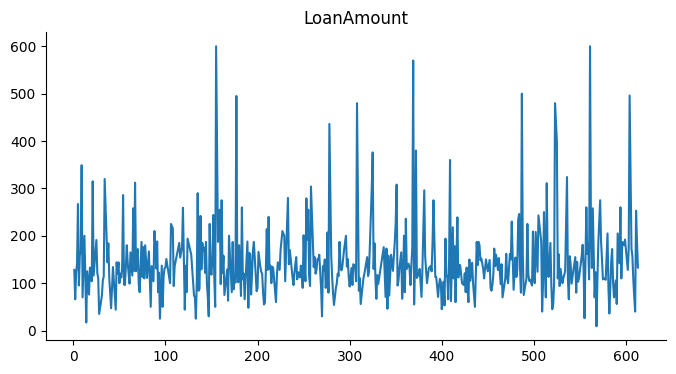

In [81]:
df_train['LoanAmount'].plot(kind='line', figsize=(8, 4), title='LoanAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

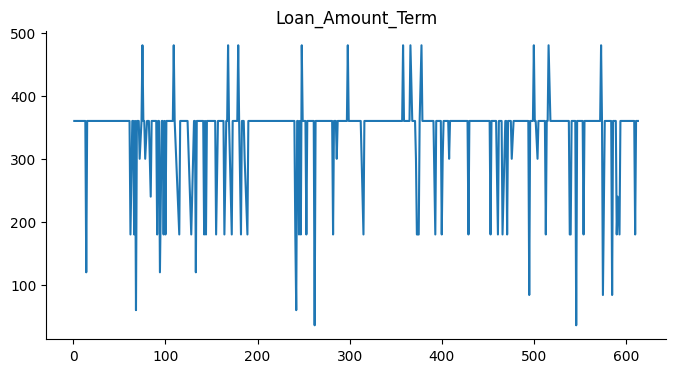

In [82]:
df_train['Loan_Amount_Term'].plot(kind='line', figsize=(8, 4), title='Loan_Amount_Term')
plt.gca().spines[['top', 'right']].set_visible(False)

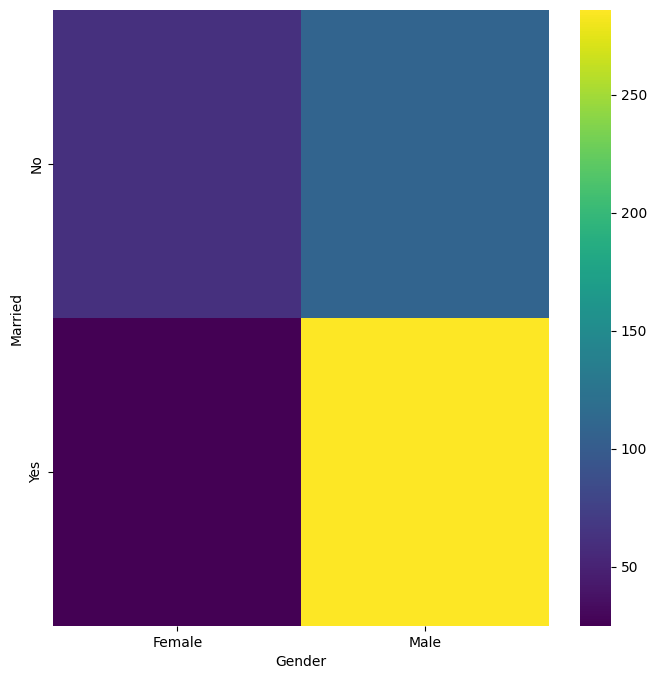

In [83]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Married'].value_counts()
    for x_label, grp in df_train.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Married')

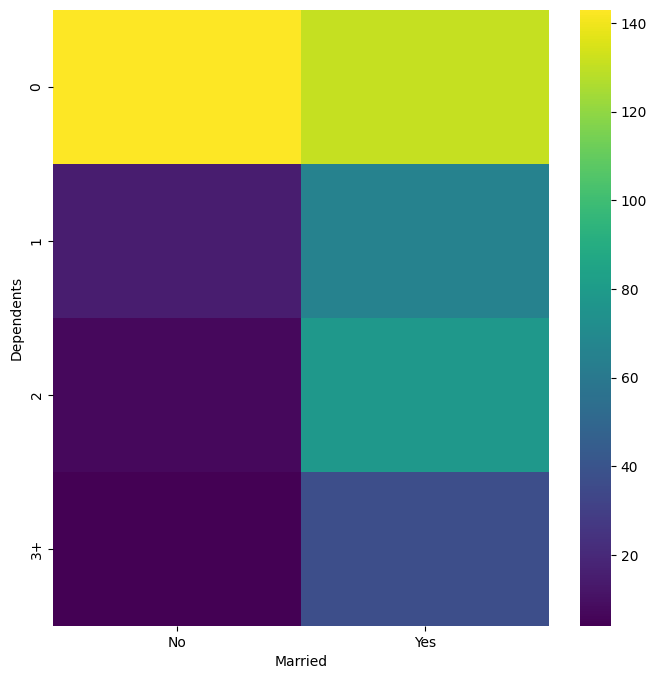

In [84]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dependents'].value_counts()
    for x_label, grp in df_train.groupby('Married')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Married')
_ = plt.ylabel('Dependents')

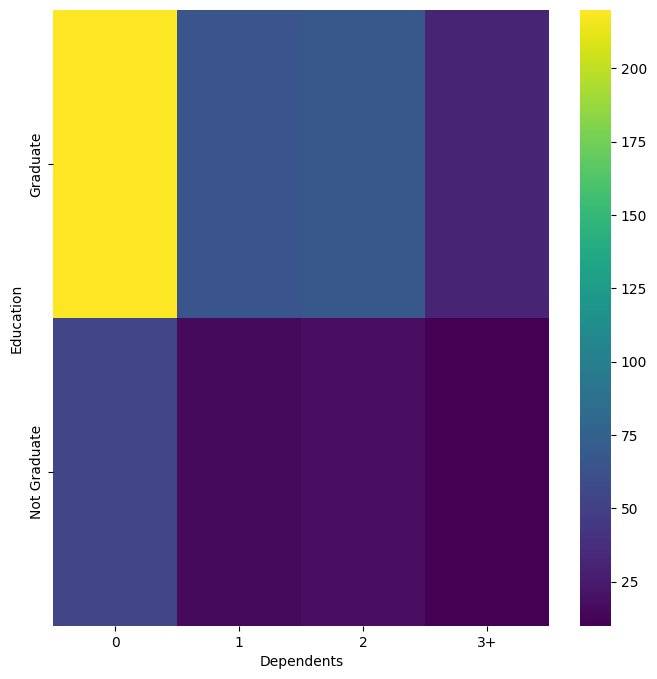

In [85]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Education'].value_counts()
    for x_label, grp in df_train.groupby('Dependents')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Dependents')
_ = plt.ylabel('Education')

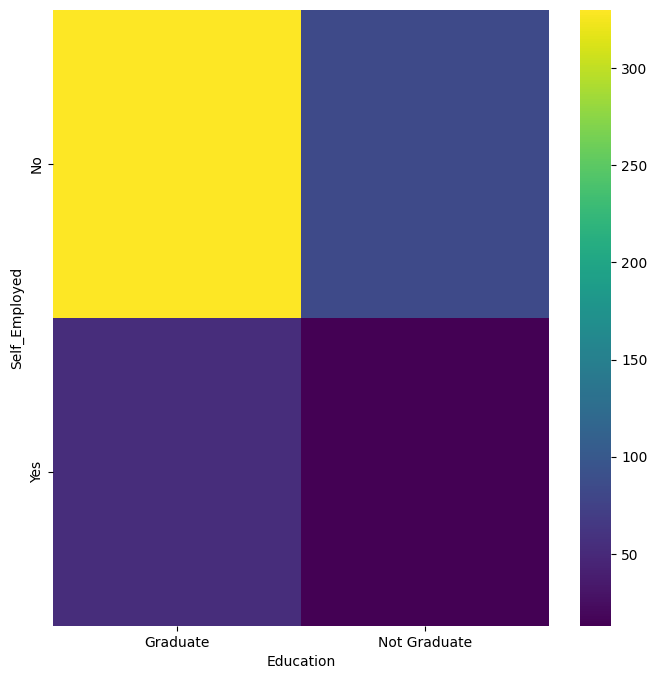

In [86]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Self_Employed'].value_counts()
    for x_label, grp in df_train.groupby('Education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education')
_ = plt.ylabel('Self_Employed')

C:\Users\drxmu\AppData\Local\Temp\ipykernel_13892\808811845.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Loan_Amount_Term', y='LoanAmount', hue='Property_Area', data=df_train, ci=None, palette='Set1')


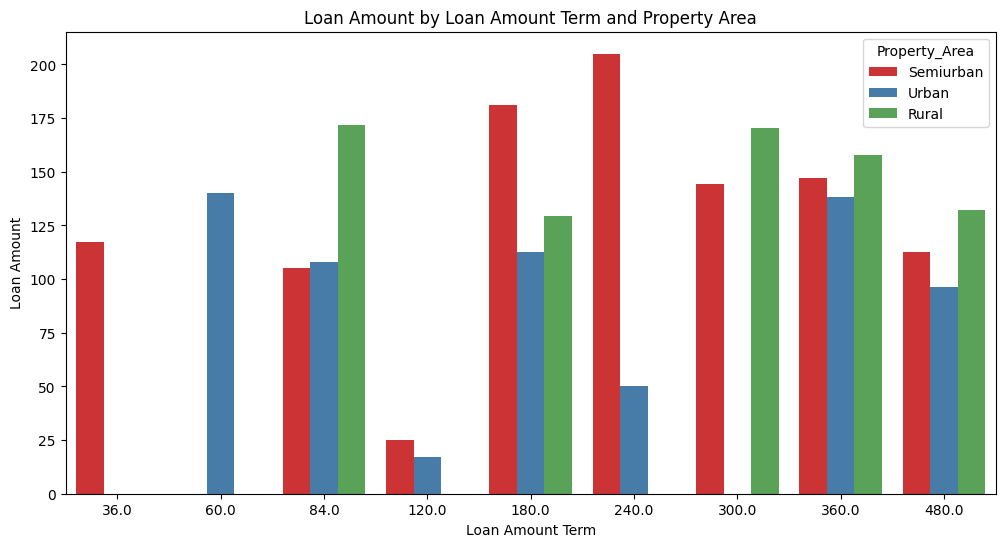

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Loan_Amount_Term', y='LoanAmount', hue='Property_Area', data=df_train, ci=None, palette='Set1')
plt.title('Loan Amount by Loan Amount Term and Property Area')
plt.xlabel('Loan Amount Term')
_ = plt.ylabel('Loan Amount')

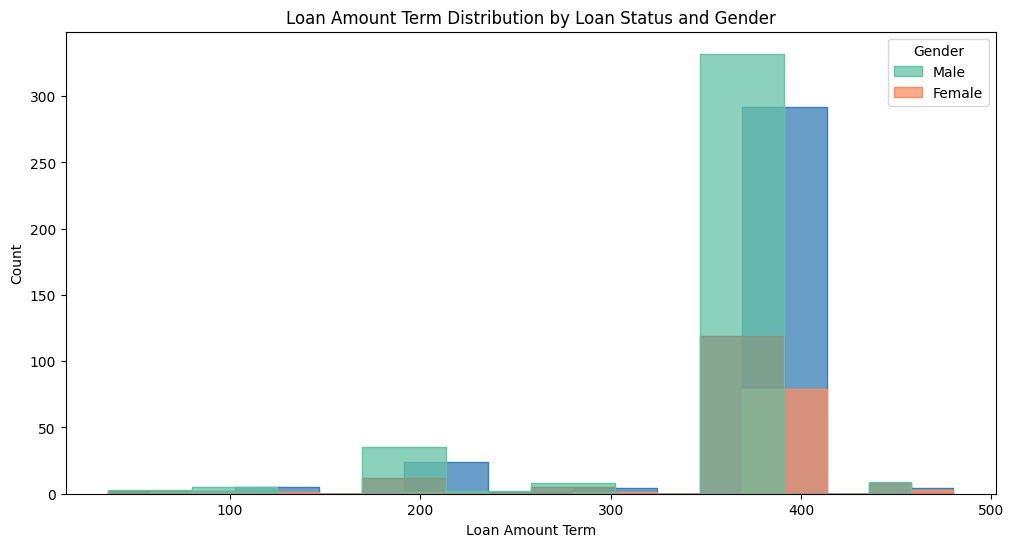

In [88]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Loan_Amount_Term', hue='Loan_Status', data=df_train, multiple='dodge', element='step', palette='Set1')
sns.histplot(x='Loan_Amount_Term', hue='Gender', data=df_train, multiple='dodge', element='step', palette='Set2')

plt.title('Loan Amount Term Distribution by Loan Status and Gender')
plt.xlabel('Loan Amount Term')
_ = plt.ylabel('Count')

C:\Users\drxmu\AppData\Local\Temp\ipykernel_13892\153595405.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Loan_Amount_Term', y='LoanAmount', hue='Credit_History', data=df_train, ci=None)


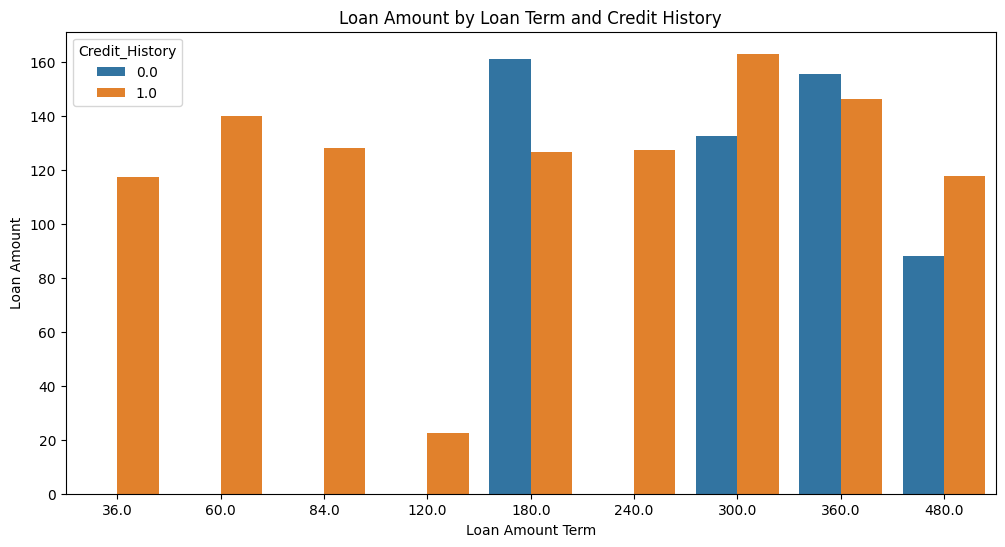

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Loan_Amount_Term', y='LoanAmount', hue='Credit_History', data=df_train, ci=None)
plt.title('Loan Amount by Loan Term and Credit History')
plt.xlabel('Loan Amount Term')
_ = plt.ylabel('Loan Amount')

C:\Users\drxmu\AppData\Local\Temp\ipykernel_13892\304991523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_train, x='ApplicantIncome', y='Gender', inner='stick', palette='Dark2')


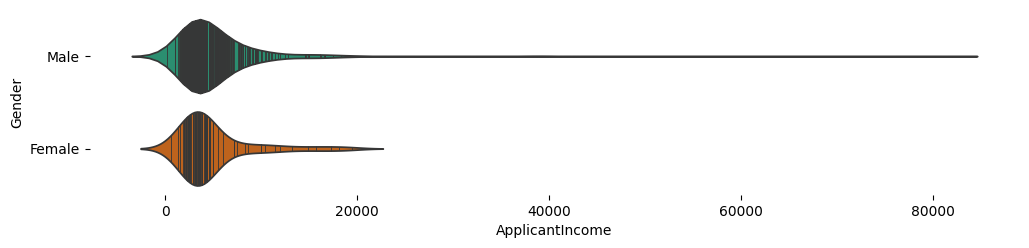

In [90]:
figsize = (12, 1.2 * len(df_train['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_train, x='ApplicantIncome', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

C:\Users\drxmu\AppData\Local\Temp\ipykernel_13892\4040017648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_train, x='ApplicantIncome', y='Married', inner='stick', palette='Dark2')


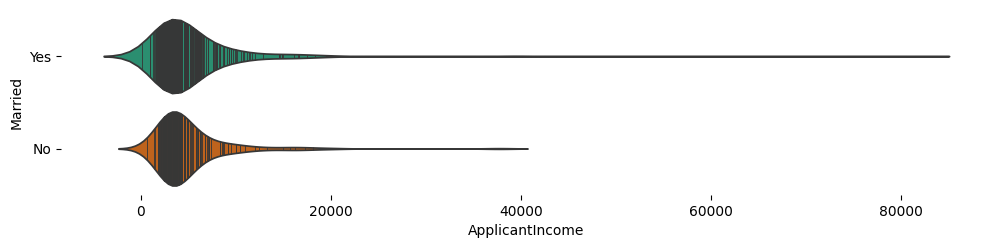

In [91]:
figsize = (12, 1.2 * len(df_train['Married'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_train, x='ApplicantIncome', y='Married', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

C:\Users\drxmu\AppData\Local\Temp\ipykernel_13892\4049440825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_train, x='ApplicantIncome', y='Dependents', inner='stick', palette='Dark2')


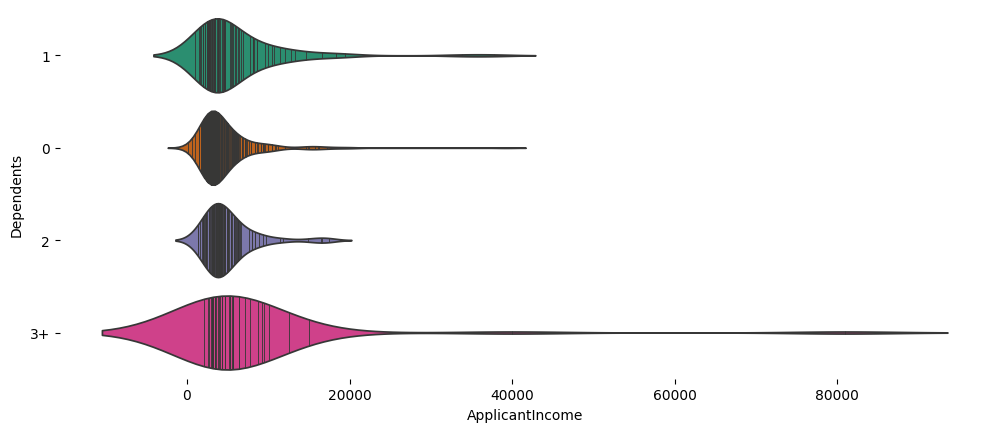

In [92]:
figsize = (12, 1.2 * len(df_train['Dependents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_train, x='ApplicantIncome', y='Dependents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

C:\Users\drxmu\AppData\Local\Temp\ipykernel_13892\3877238832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_train, x='ApplicantIncome', y='Education', inner='stick', palette='Dark2')


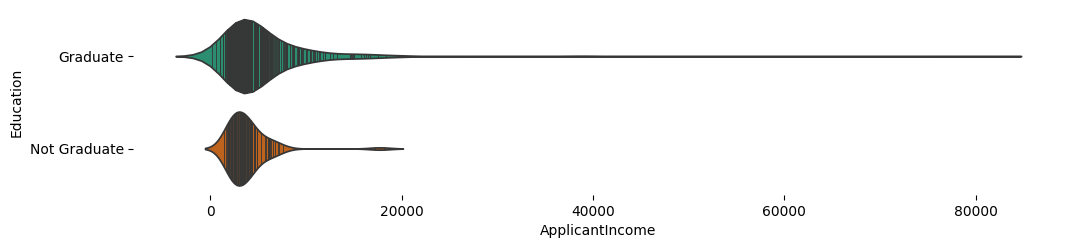

In [93]:
figsize = (12, 1.2 * len(df_train['Education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_train, x='ApplicantIncome', y='Education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

14